<a href="https://colab.research.google.com/github/adegoroye25/LaGuardia25/blob/main/PythonProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
#loading the data#
df = pd.read_csv("https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv")
df.iloc[:, 0:18]
#df
ndf = df.iloc[:, [0,1,2,3,4,18]]
ndf

#Data Cleaning
ndf = ndf[~ndf["diag_1"].astype(str).str.contains(r"V.*")]
ndf = ndf[~ndf["diag_1"].astype(str).str.contains(r"E.*")]
ndf = ndf[~ndf["diag_1"].astype(str).str.contains(r"\?")]
ndf['diag_1'].unique()
ndf['diag_1'] = ndf['diag_1'].astype(str).astype(float)

#Selected specific group (African American 70-80)
final_df = ndf[(ndf['age'] == '[70-80)') & (ndf['race'] == 'AfricanAmerican')]

#Descriptive statistics of mean of diag_1 grouped by age,then gender, then race
ddf = ndf.iloc[:, 2:6]
grouped_df = ddf.groupby(["age","gender", 'race']).mean()
grouped_df.head(30)

ndf

,encounter_id,patient_nbr,race,gender,age,diag_1
0,2278392,8222157,Caucasian,Female,[0-10),250.83
1,149190,55629189,Caucasian,Female,[10-20),276.00
2,64410,86047875,AfricanAmerican,Female,[20-30),648.00
3,500364,82442376,Caucasian,Male,[30-40),8.00
4,16680,42519267,Caucasian,Male,[40-50),197.00
...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),250.13
101762,443847782,74694222,AfricanAmerican,Female,[80-90),560.00
101763,443854148,41088789,Caucasian,Male,[70-80),38.00
101764,443857166,31693671,Caucasian,Female,[80-90),996.00


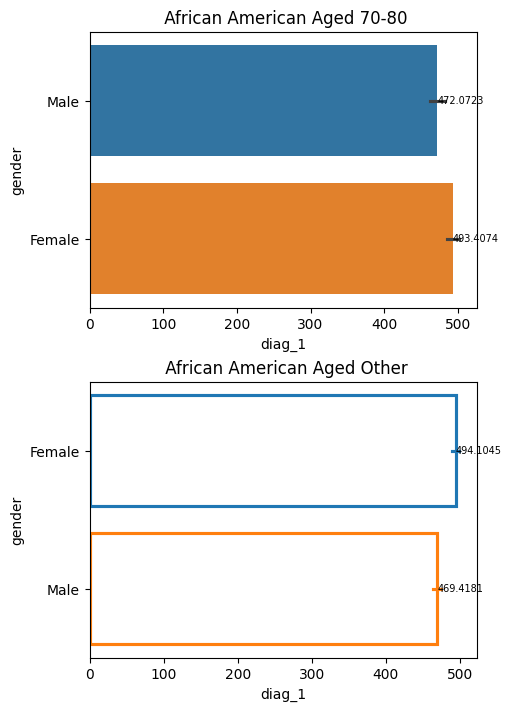

In [16]:
from pickle import FALSE
#Comparing Specific group to African Americans of other ages
other_df = ndf[(ndf['age'] != '[70-80)') & (ndf['race'] == 'AfricanAmerican')]

#Graphing the difference between the ages
fig, ax = plt.subplots(2, figsize=(5, 7), constrained_layout=True)
ax[0]= sns.barplot(data=final_df, x=final_df['diag_1'],y= final_df['gender'], ax=ax[0], fill=True, hue=final_df['gender'])
ax[1]= sns.barplot(data=other_df, x=other_df['diag_1'],y= other_df['gender'], ax=ax[1], fill=False, hue=other_df['gender'])
ax[0].set_title(" African American Aged 70-80")
ax[1].set_title(" African American Aged Other")

for bars in ax[0].containers:
    ax[0].bar_label(bars, fmt='%.4f', fontsize=7)

for bars in ax[1].containers:
    ax[1].bar_label(bars, fmt='%.4f', fontsize=7)
plt.show()

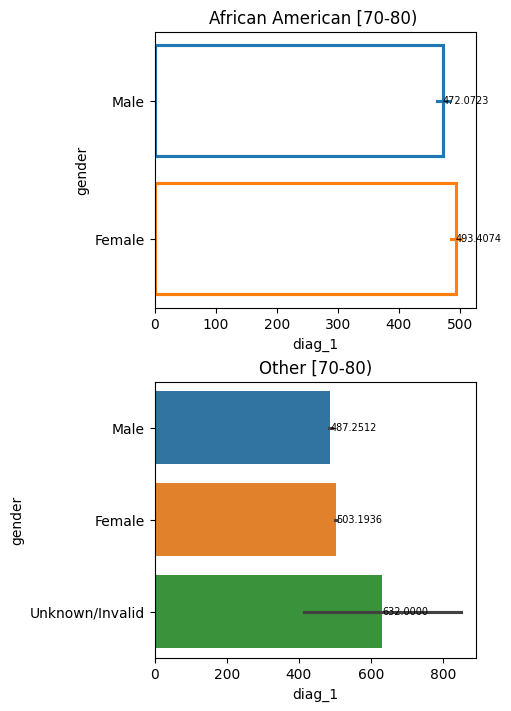

In [19]:

#Comparing Specific group to ages 70-80 of different ages
other_df2 = ndf[(ndf['age'] == '[70-80)') & (ndf['race'] != 'AfricanAmerican')]

#Graphing the difference between the different races
fig, ax = plt.subplots(2, figsize=(5, 7), constrained_layout=True)
ax[0]= sns.barplot(data=final_df, x=final_df['diag_1'],y= final_df['gender'], fill=False, ax=ax[0], hue=final_df['gender'])
ax[1] = sns.barplot(data=other_df2, x=other_df2['diag_1'],y= other_df2['gender'], ax=ax[1], fill=True, hue=other_df2['gender'])
ax[0].set_title("African American [70-80) ")
ax[1].set_title("Other [70-80)")

for bars in ax[0].containers:
    ax[0].bar_label(bars, fmt='%.4f', fontsize=7)

for bars in ax[1].containers:
    ax[1].bar_label(bars, fmt='%.4f', fontsize=7)
plt.show()